<a href="https://colab.research.google.com/github/JayabharathiRavi/D19_Task_6/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [141]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.shape

(15, 2)

In [5]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [7]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

There is no null values in the dataset.No need of encoding.scaling is not mandatory.Good to move forward

In [ ]:
#Chirps/Second         target variable
#Ground Temperature    feature

## **EDA**

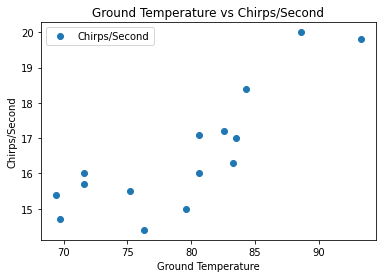

In [142]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

By plot, The chirps/second is may increase with respect to the temperature

In [9]:
df[['Ground Temperature','Chirps/Second']].corr()

,Ground Temperature,Chirps/Second
Ground Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


There is strong linear relation b/w data.No transformation required.

## **SPLIT**

In [275]:
X = df.iloc[:, :-1].values # feature as arrays
y = df.iloc[:, 1].values # target as arrays
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

# **Linear regression model**

In [277]:
from sklearn.linear_model import LinearRegression
regressor = linear_model.LinearRegression()   
regressor.fit(X_train, y_train)
#y=mx+c
#chrips/second=m(Ground Temperature)+c  

LinearRegression()

In [ ]:
#Good to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [283]:
regressor.intercept_

22.848982308066887

In [284]:
regressor.coef_

array([3.410323])

In [264]:
y_pred = regressor.predict(X_test)
y_pred

array([77.4141503, 81.1655056, 77.4141503])

In [265]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,80.6,77.414150
1,80.6,81.165506
2,71.6,77.414150


1. Find the linear regression equation for this data.


In [ ]:
#chrips/second = 0.20299973 (Ground Temperature) + 0.45931464523595267

2. Chart the original data and the equation on the chart.

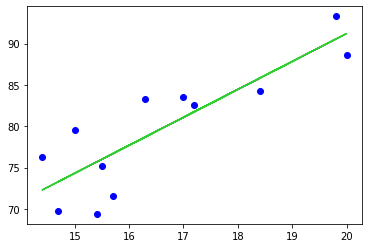

In [278]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='limegreen')

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [289]:
print('R2- SCORE:', regressor.score(X_train, y_train))

R2- SCORE: 0.7309405659703829



4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [286]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [296]:
linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])


5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [290]:
linreg.coef_,linreg.intercept_ 

(array([0.20299973]), 0.45931464523595267)

In [291]:
(18 - linreg.intercept_) / linreg.coef_

array([86.40743135])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [293]:
from google.colab import files
files.upload()

Saving brain_body.txt to brain_body.txt


{'brain_body.txt': b'Brain        Body\n    3.385    44.500\n    0.480    15.500\n    1.350     8.100\n  465.000   423.000\n   36.330   119.500\n   27.660   115.000\n   14.830    98.200\n    1.040     5.500\n    4.190    58.000\n    0.425     6.400\n    0.101     4.000\n    0.920     5.700\n    1.000     6.600\n    0.005     0.140\n    0.060     1.000\n    3.500    10.800\n    2.000    12.300\n    1.700     6.300\n 2547.000  4603.000\n    0.023     0.300\n  187.100   419.000\n  521.000   655.000\n    0.785     3.500\n   10.000   115.000\n    3.300    25.600\n    0.200     5.000\n    1.410    17.500\n  529.000   680.000\n  207.000   406.000\n   85.000   325.000\n    0.750    12.300\n   62.000  1320.000\n 6654.000  5712.000\n    3.500     3.900\n    6.800   179.000\n   35.000    56.000\n    4.050    17.000\n    0.120     1.000\n    0.023     0.400\n    0.010     0.250\n    1.400    12.500\n  250.000   490.000\n    2.500    12.100\n   55.500   175.000\n  100.000   157.000\n   52.160   440

In [294]:
df = pd.read_fwf("brain_body.txt")

In [297]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [299]:
print(df.shape)
df.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [300]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

There is no null values, no need of encoding. Good to move forward.

## **EDA**

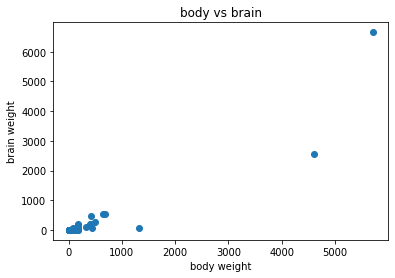

In [307]:
x=df['Body']
y=df['Brain']
plt.scatter(x,y)
plt.xlabel('body weight')
plt.ylabel('brain weight')
plt.title('body vs brain')
plt.show()

By this plot higher body weight may have high brain weight

In [ ]:
df

In [303]:
df[['Body','Brain']].corr()

,Body,Brain
Body,1.000000,0.934164
Brain,0.934164,1.000000


There is a good correlation.There is a linear relationship b/w data.

## **Linear Regression**

In [324]:
x=df['Body']
x=x.to_frame()
y=df['Brain']

In [332]:
regressor=linear_model.LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [335]:
regressor.intercept_

-56.85554542859637

In [328]:
regressor.coef_

array([0.90291295])

In [330]:
regressor.score(x,y)

0.8726620843043331

1. Find the linear regression equation for this data for brain weight to body weight.


In [ ]:
#y=mx+c
#Brain=Body(0.90291295)+(-56.85554542859637)

2. Chart the original data and the equation on the chart.

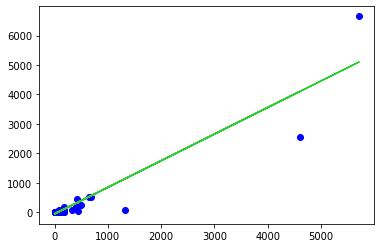

In [337]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='limegreen')

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [341]:
print('R2 score:',regressor.score(x,y))

R2 score: 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [85]:
from google.colab import files
files.upload()

Saving salary.txt to salary.txt


{'salary.txt': b'       0    3    25    1    35    36350\r\n       0    3    13    1    22    35350\r\n       0    3    10    1    23    28200\r\n       1    3     7    1    27    26775\r\n       0    3    19    0    30    33696\r\n       0    3    16    1    21    28516\r\n       1    3     0    0    32    24900\r\n       0    3    16    1    18    31909\r\n       0    3    13    0    30    31850\r\n       0    3    13    0    31    32850\r\n       0    3    12    1    22    27025\r\n       0    2    15    1    19    24750\r\n       0    3     9    1    17    28200\r\n       0    2     9    0    27    23712\r\n       0    3     9    1    24    25748\r\n       0    3     7    1    15    29342\r\n       0    3    13    1    20    31114\r\n       0    2    11    0    14    24742\r\n       0    2    10    0    15    22906\r\n       0    3     6    0    21    24450\r\n       0    1    16    0    23    19175\r\n       0    2     8    0    31    20525\r\n       0    3     7    1    13    279

In [86]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [87]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [88]:
print(df.shape)
print(df.isnull().sum())

(52, 6)
Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64


In [89]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


By Analysising the above df there is no null values.
It has proper values and there is no scaling is mandatory.

In [ ]:
#sex,rank,year,degree and ysdeg are features
#salary is our target variable

##**EDA**

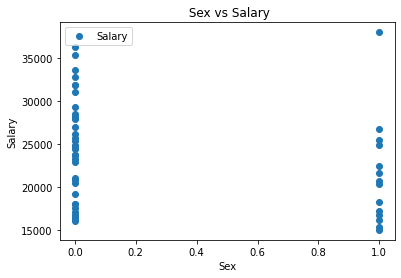

<function matplotlib.pyplot.tight_layout>

In [90]:
df.plot(x='Sex', y='Salary', style='o')
plt.title(' Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
plt.tight_layout

1 for female,
0 for male,
By sex vs salary plotting we can saw male consumes more salary than female

In [91]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


There is low linear relation b/w the data.There is no transformation required.

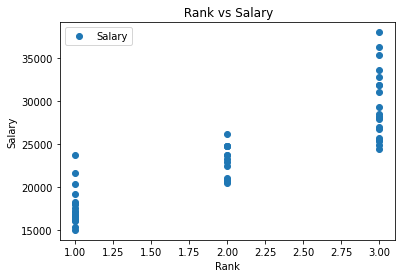

In [92]:
df.plot(x='Rank', y='Salary', style='o')
plt.title(' Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

By this plot we came to know high rank can got high salary

In [93]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


There is high linear relation b/w the data.There is no transformation required.

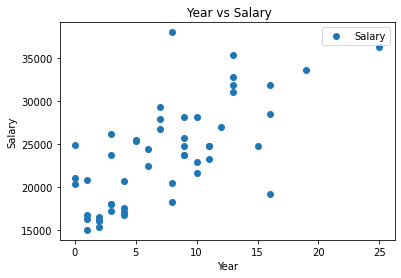

In [94]:
df.plot(x='Year', y='Salary', style='o')
plt.title(' Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

By this plot some experience can make high rate in salary package

In [95]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


There is high linear relation b/w the data.There is no transformation required.

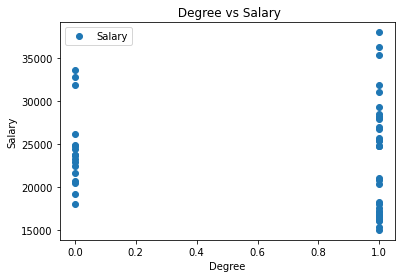

In [96]:
df.plot(x='Degree', y='Salary', style='o')
plt.title(' Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

1 for doctorate, 0 for master's.
By analysing the plot doctorate can consumes more salary than master's.

In [97]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


There is no linear relation b/w the data.But we assume as linear.

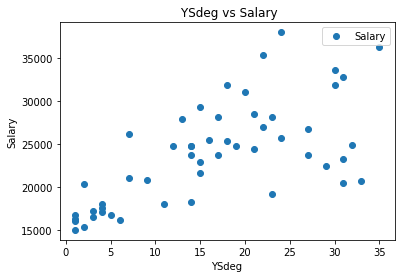

In [98]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title(' YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

By this plot year by year the highest degree ratings are increasing as well as the salary too.

In [99]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


There is high linear relation b/w the data.There is no transformation required.

## **SPLIT**

In [109]:
X = df[['Sex', 'Rank','Year','Degree','YSdeg']].values 
y = df['Salary'].values

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [130]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# **Training the model**

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [132]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
#y=mx+c
#Salary = 900.982551*Sex+4575.529511*Rank+2852.835738*Year+(-609.193787)*Degree+(-1544.377856)*YSdeg +24626.975609756097

,Coefficient
Sex,900.982551
Rank,4575.529511
Year,2852.835738
Degree,-609.193787
YSdeg,-1544.377856


In [133]:
regressor.intercept_  

24626.975609756097

In [134]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,28200,28928.687453
1,18075,16755.165242
2,32850,29928.712301
3,16686,18404.599783
4,17600,17266.183508
5,18304,19837.837285
6,23712,22918.646323
7,15000,18404.599783
8,15350,18750.703406
9,24900,25297.287345


In [135]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8828228817754297


By R2-score ,it is good model.Because, the value is somewhat  close to 1.

In [ ]:
!pip install scikit-learn==0.24.2

In [136]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Sex', 'Rank','Year','Degree','YSdeg'],sfs.get_support())))

[('Sex', False), ('Rank', True), ('Year', True), ('Degree', False), ('YSdeg', False)]


In [137]:
print('Features & Coefficients')
print(list(zip(['Sex', 'Rank','Year','Degree','YSdeg'], regressor.coef_)))

Features & Coefficients
[('Sex', 900.9825507486637), ('Rank', 4575.529510522275), ('Year', 2852.8357382845124), ('Degree', -609.1937871917013), ('YSdeg', -1544.3778555835875)]


In [ ]:
male=[]
female=[]
for i in df['Sex'].values:
  if i ==0:
    male.append(0)
  else:
    female.append(1) 
len(male),len(female)

(38, 14)

In [ ]:
#Therefore male and female not in equal scale
df


1. Find the linear regression equation for this data using columns 1-5 to column 6.

> *Salary = 900.982551(Sex) + 4575.529511(Rank) + 2852.835738(Year) -609.193787(Degree)-1544.377856(YSdeg) +24626.975609756097*

2. Find the selection of columns with the best $R^2$ score.

> *R2- SCORE: 0.6654587326245043*

3. Report whether sex is a factor in salary.

> *sex may be a factor in salary.But the main factor in salary is rank and year*.

